<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overfitting
This notebook will look at overfitting, and is divided into four sections, meant to build up an intuition of what overfitting is, how to guard against overfitting, and the guarantees you do and do not get when guarding against overfitting.

This notebook uses data simulation rather than using an existing dataset. Simulating data is typically used to better understand specific behavior or characteristics of statistical models, as we start off simulating a 'ground truth', and then apply statistical methods to see to what extent these can approach that ground truth, under what circumstances our models fail to approach the ground truth, etc.

In [1]:
# installing and loading the required packages
install.packages('ggplot2')
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##Section 1
This section considers what happens to the quality of your models, when you make these models more and more flexible (i.e. complex).

Before we do that, we start with defining the data generating process, in which we define how exactly input relates to output. 

,Y,X1
,<dbl>,<dbl>
1,2960.1094,3.282393
2,14511.8305,13.108878
3,14351.8838,14.004373
4,2812.6319,3.055538
5,-632.5899,6.428216
6,7729.8707,8.379695


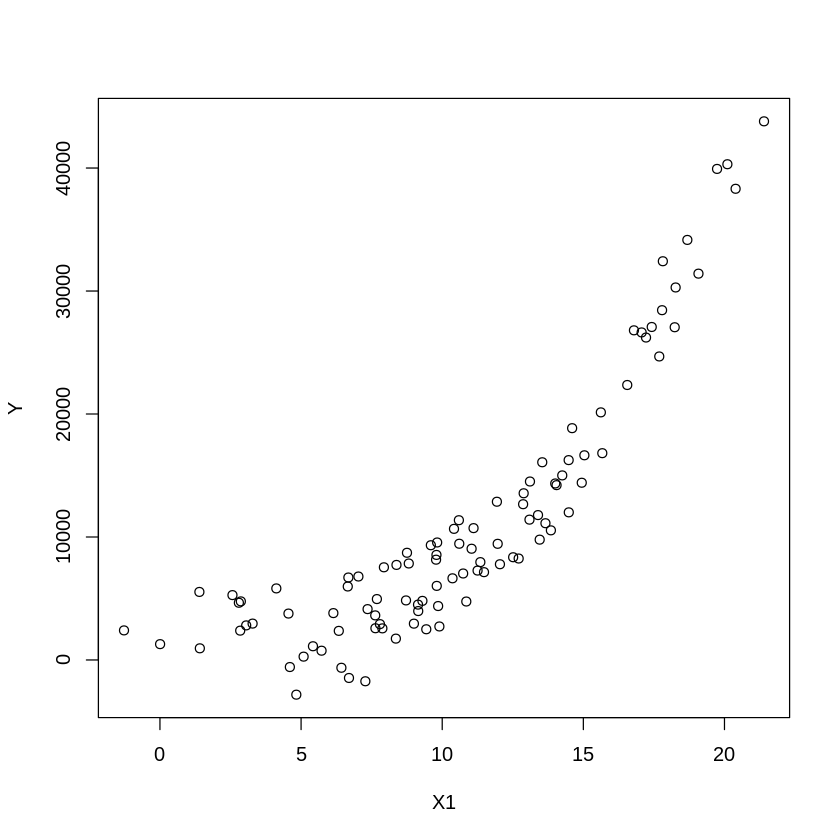

In [33]:
set.seed(456)

# define data generating process
X1 <- rnorm(100,10,5)
e <- rnorm(100,0,2500)
Y <- 2530 + 20*X1 - 10*X1^2 + 5*X1^3+e
df <- as.data.frame(cbind(Y,X1))
head(df)
plot(X1, Y)

In this next step, we estimate 20 increasingly more flexible regression models, starting with a simple linear model where Y is explained by X in the form of Y = a + bX, which is then increased with an additional polynomial of X in each additional model, such that the second model has the form Y = a + bX + cX^2, the third model has the form Y = a + bX + cX^2 + dX^3, etc.

The aim is to compare how well each of these models fit the data, so we need a metric which can be used to compare the fit of the different models. We use RMSE, Root Mean Squared Error, as a summary measure for the distance between modelled outcomes and true outcomes.

In [34]:
# estimate linear models with increasingly higher polynomial terms, save predictions, calculate RMSE
RMSE <- numeric()
for (i in 1:20) {
        assign(paste("lm",i,sep=""), lm(Y~poly(X1,i, raw=T), df))        
        prediction <-  predict(lm(Y~poly(X1,i, raw=T), df))        
        RMSE <- c(RMSE,sqrt(mean((Y-prediction)^2)))
}

The first four models are shown in the graph below.

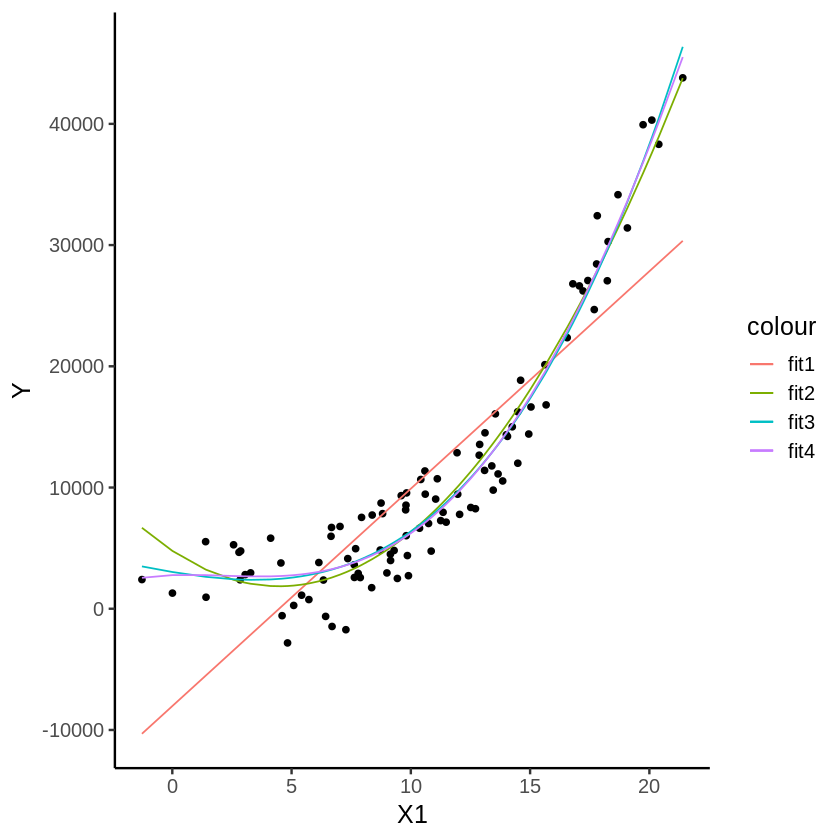

In [35]:
# plot different models
fits <- as.data.frame(cbind(X1, predict(lm1), predict(lm2), predict(lm3), predict(lm4)))
names(fits) <- c("X1", "fit1", "fit2", "fit3", "fit4")

ggplot(data=df, aes(x = X1, y = Y))+
        geom_point() + theme_set(theme_bw(base_size = 15)) + 
        geom_line(data = fits, aes(x = X1, y = fit1, colour = "fit1")) + 
        geom_line(data = fits, aes(x = X1, y = fit2, colour = "fit2")) + 
        geom_line(data = fits, aes(x = X1, y = fit3, colour = "fit3")) + 
        geom_line(data = fits, aes(x = X1, y = fit4, colour = "fit4")) 

As certain models are very comparable, we need to use the RMSE for each model, such that we can decide what model is best fitting the data

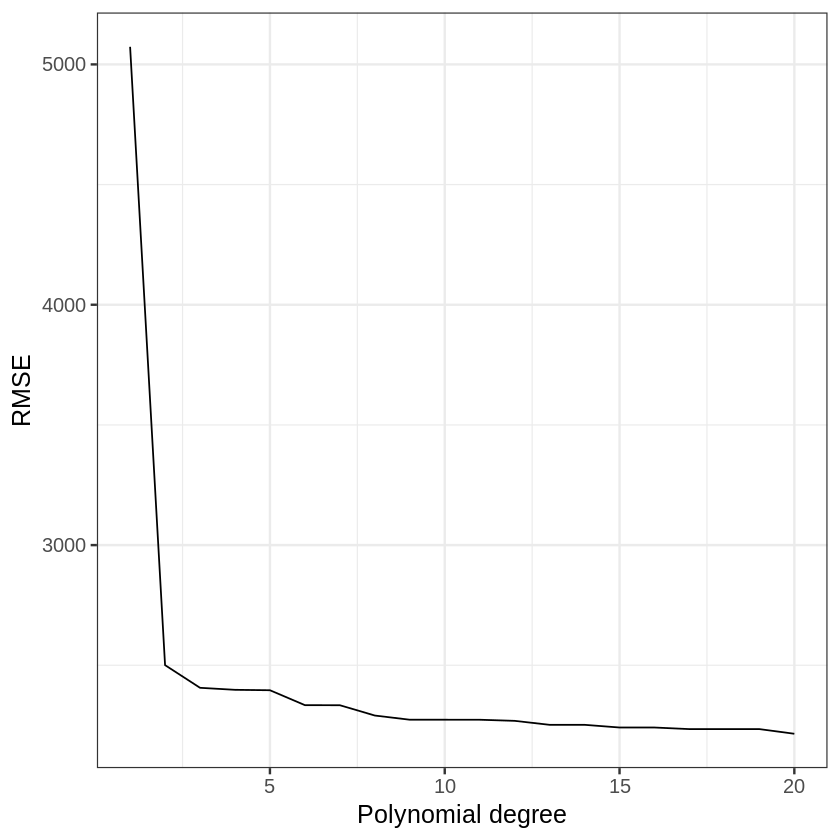

In [36]:
#plot error (RMSE) for different degrees of flexibility/complexity 
RMSE <- as.data.frame(RMSE)
ggplot(data=RMSE, aes(x=1:20,y=RMSE))+geom_line()+theme_set(theme_classic(base_size = 15))+xlab("Polynomial degree")

We see that the more complex/flexible the model, the better it fits

# Section 2
Here we see what happens if we add 'predictors' that have no relation with our outcome Y at all

In [37]:
rm(list=ls())
set.seed(456)

# define datagenerating process
X1 <- rnorm(100,10,5)
X2 <- rnorm(100,10,5)
X3 <- rnorm(100,10,5)
X4 <- rnorm(100,10,5)
X5 <- rnorm(100,10,5)
X6 <- rnorm(100,10,5)
X7 <- rnorm(100,10,5)
e <- rnorm(100,0,2500)
Y <- 2530 + 20*X1 - 10*X1^2 + 5*X1^3+e
df <- as.data.frame(cbind(Y,X1,X2,X3,X4,X5,X6,X7))

Again, we estimate 20 different models, that get increasingly complex, this time using all the available predictors, so including the ones having no relation with the outcome Y.

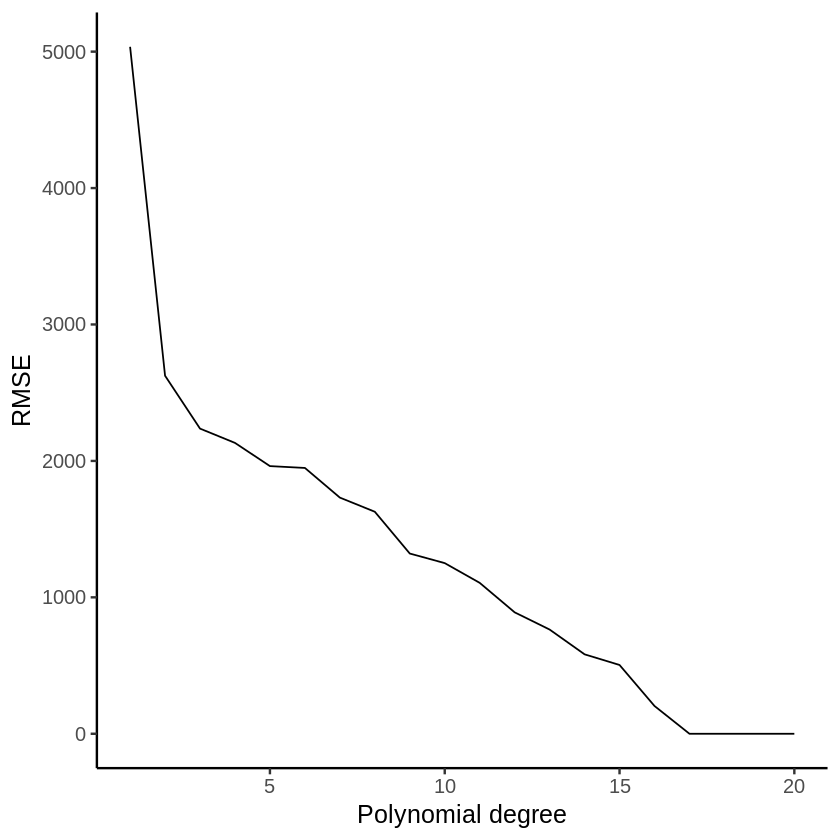

In [38]:
# estimate linear models with increasingly higher polynomial terms, save predictions, calculate RMSE
RMSE <- numeric()
for (i in 1:20) {
assign(paste("lm",i,sep=""), lm(Y~poly(X1,i, raw=T)+poly(X2,i, raw=T)+poly(X3,i, raw=T)+poly(X4,i, raw=T)+poly(X5,i, raw=T)+poly(X6,i, raw=T)+poly(X7,i, raw=T), df))        
prediction <-  predict(lm(Y~poly(X1,i, raw=T)+poly(X2,i, raw=T)+poly(X3,i, raw=T)+poly(X4,i, raw=T)+poly(X5,i, raw=T)+poly(X6,i, raw=T)+poly(X7,i, raw=T), df))        
RMSE <- c(RMSE,sqrt(mean((Y-prediction)^2)))
}

#plot training error (RMSE) for different degrees of complexity 
library(ggplot2)
RMSE <- as.data.frame(RMSE)
ggplot(data=RMSE, aes(x=1:20,y=RMSE))+geom_line()+theme_set(theme_classic(base_size = 15))+xlab("Polynomial degree")

We now see that the error drops down to zero, meaning that in our most complex/flexible models, we get a perfect fit, using data that mostly has nothing to do with our outcome Y!

# Section 3
We now introduce splitting the data, where we train our (increasingly complex/flexible) models on one part of the data, and evaluate the fit of these models on another part of the data. 
First we simulate a new dataset where we define that Y is determined by X, X^2 and X^3.

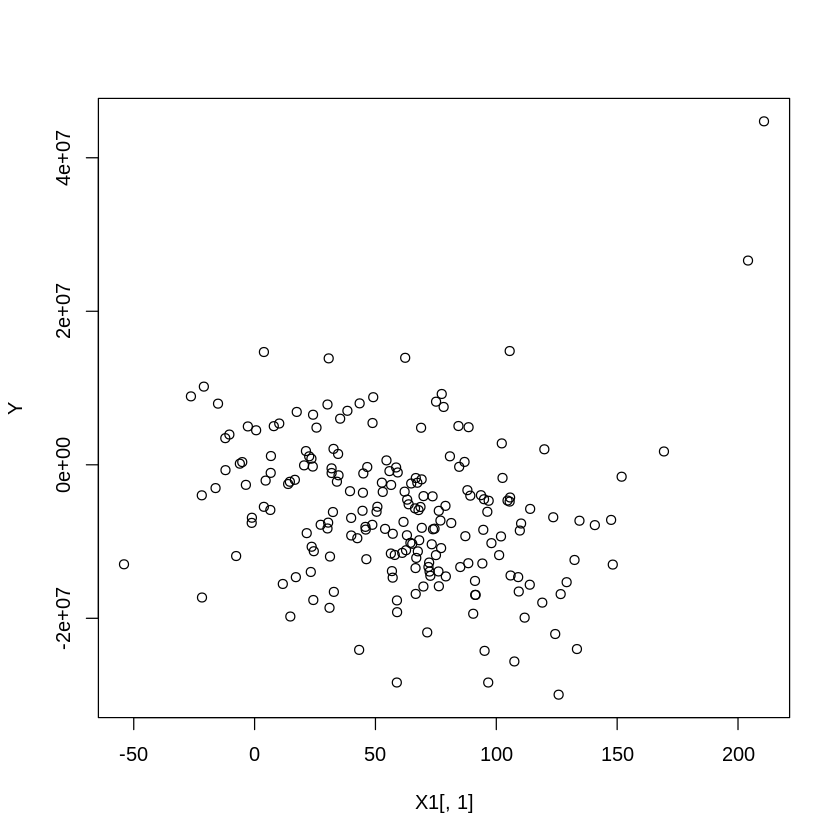

In [39]:
## SECTION 3
rm(list=ls())
set.seed(45)

# define datagenerating process
X1_tot <- rnorm(250,60,40)
e_tot <- rnorm(250,0,8000000)
X1_tot <- as.data.frame(poly(X1_tot,20,raw=TRUE))
X1 <- X1_tot[1:200,]
X1_val <- X1_tot[201:250,]
e <- e_tot[1:200]
e_val <- e_tot[201:250]
Y <- 253 + 20*X1[,1] - 2500*X1[,1]^2 + 15*X1[,1]^3+e
Y_val <- 253 + 20*X1_val[,1] - 2500*X1_val[,1]^2 + 15*X1_val[,1]^3+e_val

plot(X1[,1],Y)
df <- as.data.frame(cbind(Y,X1))

Then we estimate the models and register how well they fit both the training data as well as the validation data.

Warning message in predict.lm(model, newdata = df_val):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, newdata = df_val):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, newdata = df_val):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, newdata = df_val):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, newdata = df_val):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, newdata = df_val):
“prediction from a rank-deficient fit may be misleading”


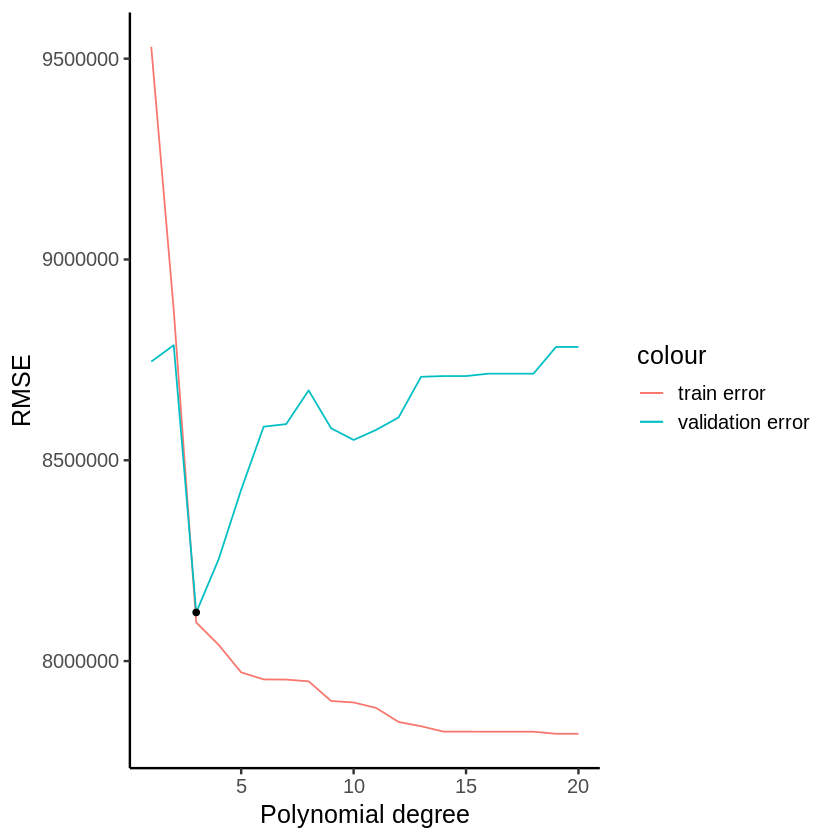

In [40]:
# estimate linear models with increasingly higher polynomial terms, save predictions, calculate RMSE
RMSE_train <- numeric()
for (i in 1:20) {
        assign(paste("lm",i,sep=""), lm(Y~., df[,1:(i+1)]))        
        prediction <-  predict(lm(Y~., df[,1:(i+1)]))        
        RMSE_train <- c(RMSE_train,sqrt(mean((Y-prediction)^2)))
}

### compare to validation data
df_val <- as.data.frame(cbind(Y_val,X1_val))

# generate test_RMSE for each of the 20 models
RMSE_val <- numeric()
for (i in 1:20) {
        model <- lm(Y~., df[,1:(i+1)])
        prediction_val <-  predict(model, newdata = df_val)        
        RMSE_val <- c(RMSE_val,sqrt(mean((Y_val-prediction_val)^2)))
}

#plot training error and test error (RMSE) for different degrees of complexity 
RMSE <- as.data.frame(cbind("polynomial" = 1:20, RMSE_train,RMSE_val))
labels <- data.frame(polynomial = RMSE[which(RMSE$RMSE_val==min(RMSE$RMSE_val)), "polynomial"], RMSE_val = RMSE[which(RMSE$RMSE_val==min(RMSE$RMSE_val)), "RMSE_val"], text = "minimum")

ggplot(data=RMSE, aes(polynomial))+
        geom_line(aes(y=RMSE_train, colour="train error"))+
        geom_line(aes(y=RMSE_val, colour="validation error"))+
        theme_set(theme_classic(base_size = 15))+xlab("Polynomial degree")+
        ylab("RMSE") +
        geom_point(data = labels, aes(polynomial, RMSE_val))

We now see that the validation set gives us the feedback we need to be able to determine what the best model is for using X to predict Y.

#Section 4

We now repeat what we did in section 3, using different data, to see that the validation set helps to guard against overfitting, but does not guarantee that we do not overfit at all.

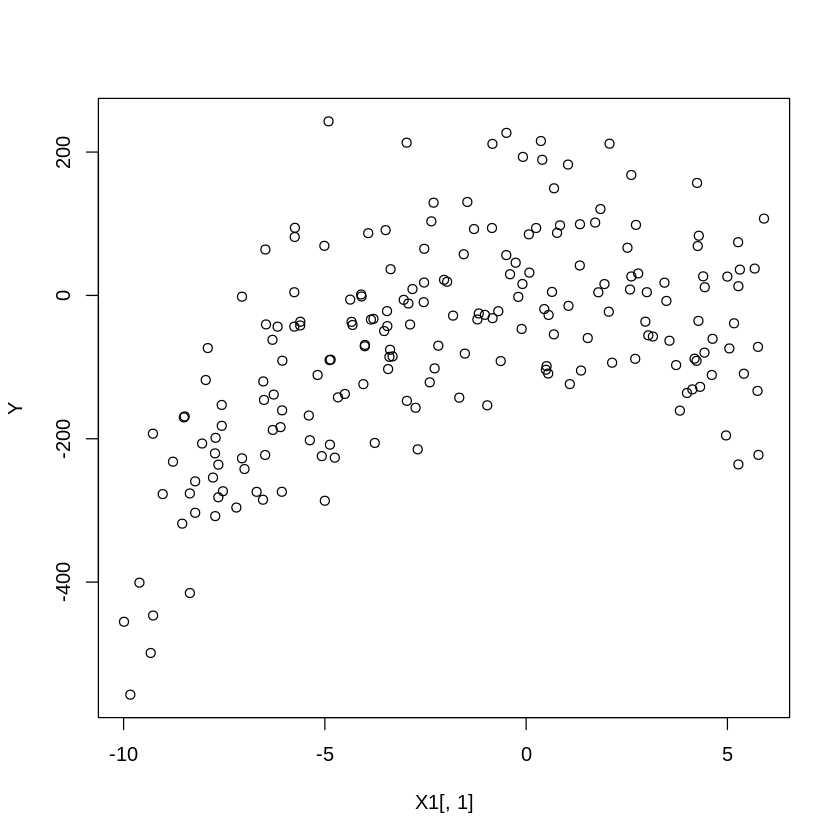

In [41]:
rm(list=ls())
set.seed(123)

# define datagenerating process
X1_tot <- runif(250,-10,6)
e_tot <- rnorm(250,0,100)
X1_tot <- as.data.frame(poly(X1_tot,20, raw=T))
names(X1_tot) <- paste("X",1:20, sep = "")
X1 <- X1_tot[1:200,]
X1_val <- X1_tot[201:250,]
e <- e_tot[1:200]
e_val <- e_tot[201:250]
Y <- 25 + 2*X1[,1] - 4*X1[,1]^2 + e
Y_val <- 25 + 2*X1_val[,1] - 4*X1_val[,1]^2 + e_val


plot(X1[,1],Y)
df <- as.data.frame(cbind(Y,X1))

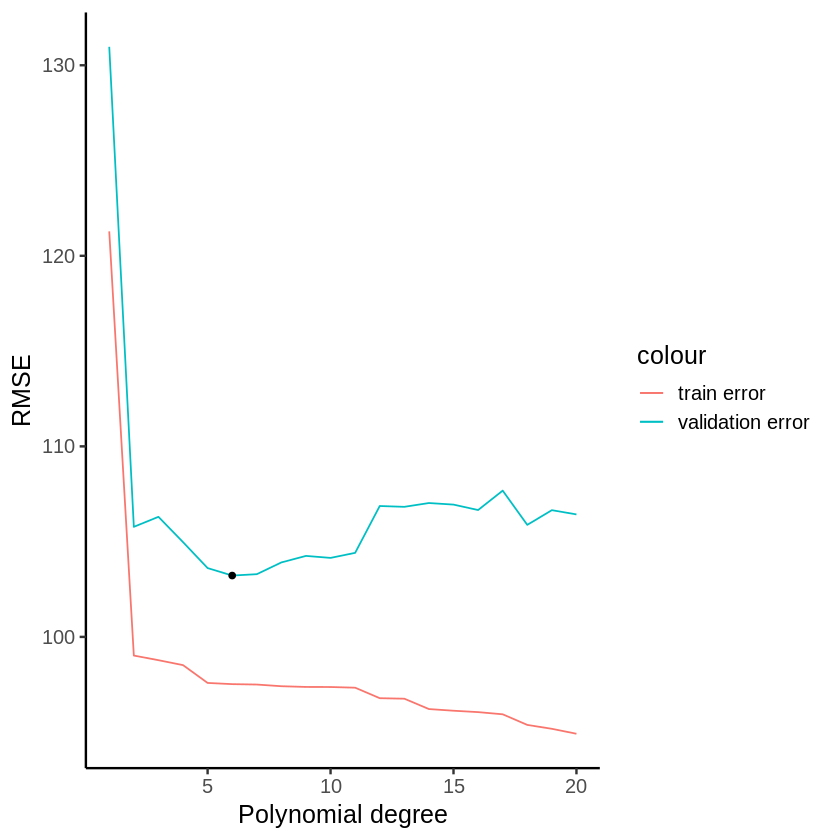

In [42]:
# estimate linear models with increasingly higher polynomial terms, save predictions, calculate RMSE
RMSE_train <- numeric()
for (i in 1:20) {
        assign(paste("lm",i,sep=""), lm(Y~., df[,1:(i+1)]))        
        prediction <-  predict(lm(Y~., df[,1:(i+1)]))        
        RMSE_train <- c(RMSE_train,sqrt(mean((Y-prediction)^2)))
}

### comparing to new (test) data
df_val <- as.data.frame(cbind(Y_val,X1_val))

# generate test_RMSE for each of the 20 models
RMSE_val <- numeric()
for (i in 1:20) {
        model <- lm(Y~., df[,1:(i+1)])
        prediction_val <-  predict(model, newdata = df_val)        
        RMSE_val <- c(RMSE_val,sqrt(mean((Y_val-prediction_val)^2)))
}

#plot training error and test error (RMSE) for different degrees of complexity 
library(ggplot2)
RMSE <- as.data.frame(cbind("polynomial" = 1:20, RMSE_train,RMSE_val))
labels <- data.frame(polynomial = RMSE[which(RMSE$RMSE_val==min(RMSE$RMSE_val)), "polynomial"], RMSE_val = RMSE[which(RMSE$RMSE_val==min(RMSE$RMSE_val)), "RMSE_val"], text = "minimum")

ggplot(data=RMSE, aes(polynomial))+ 
        geom_line(aes(y=RMSE_train, colour="train error"))+
        geom_line(aes(y=RMSE_val, colour="validation error"))+
        theme_set(theme_classic(base_size = 15))+xlab("Polynomial degree")+
        ylab("RMSE") +
        geom_point(data = labels, aes(polynomial, RMSE_val))

